In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Wine_clust.csv")

In [3]:
#kmen clustering

In [4]:
from sklearn.cluster import KMeans

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
#no null values

In [10]:
#use elbow method to find the optimal valuae of k to find the number of cluster

In [11]:
feature_set=df.iloc[:,2:4].values
feature_set

array([[ 2.43, 15.6 ],
       [ 2.14, 11.2 ],
       [ 2.67, 18.6 ],
       [ 2.5 , 16.8 ],
       [ 2.87, 21.  ],
       [ 2.45, 15.2 ],
       [ 2.45, 14.6 ],
       [ 2.61, 17.6 ],
       [ 2.17, 14.  ],
       [ 2.27, 16.  ],
       [ 2.3 , 18.  ],
       [ 2.32, 16.8 ],
       [ 2.41, 16.  ],
       [ 2.39, 11.4 ],
       [ 2.38, 12.  ],
       [ 2.7 , 17.2 ],
       [ 2.72, 20.  ],
       [ 2.62, 20.  ],
       [ 2.48, 16.5 ],
       [ 2.56, 15.2 ],
       [ 2.28, 16.  ],
       [ 2.65, 18.6 ],
       [ 2.36, 16.6 ],
       [ 2.52, 17.8 ],
       [ 2.61, 20.  ],
       [ 3.22, 25.  ],
       [ 2.62, 16.1 ],
       [ 2.14, 17.  ],
       [ 2.8 , 19.4 ],
       [ 2.21, 16.  ],
       [ 2.7 , 22.5 ],
       [ 2.36, 19.1 ],
       [ 2.36, 17.2 ],
       [ 2.7 , 19.5 ],
       [ 2.65, 19.  ],
       [ 2.41, 20.5 ],
       [ 2.84, 15.5 ],
       [ 2.55, 18.  ],
       [ 2.1 , 15.5 ],
       [ 2.51, 13.2 ],
       [ 2.31, 16.2 ],
       [ 2.12, 18.8 ],
       [ 2.59, 15.  ],
       [ 2.

In [12]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
    km.fit(feature_set)
    wcss.append(km.inertia_)  

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


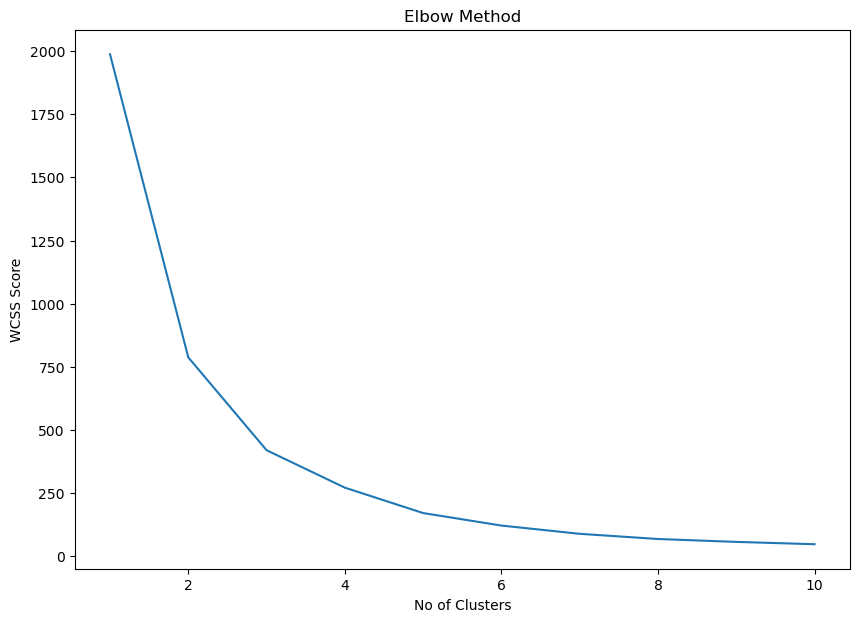

In [13]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS Score")
plt.show()

In [14]:
# elbowpoint=3

In [15]:
km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
km.fit(feature_set)

df['km_3']=km.labels_
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,6
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,8
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,9
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,7
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,9
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,9


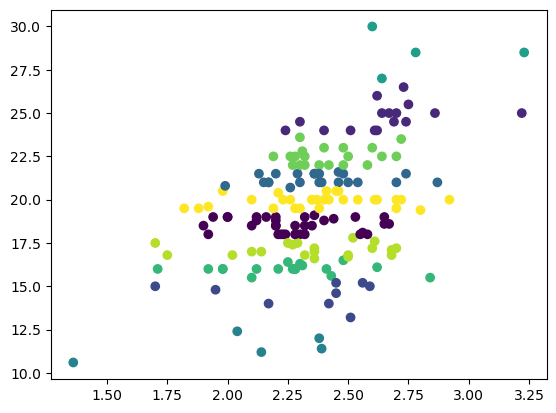

In [16]:
plt.scatter(x=df['Ash'],y=df['Ash_Alcanity'],c=df['km_3'])
plt.show()

In [17]:

for k in range (3,8):
  km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
  km.fit(feature_set)
  df[f'km_{k}']=km.labels_

df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3,km_4,km_5,km_6,km_7
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,6,6,6,6,6
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4,4,4,4,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,0,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,8,8,8,8,8
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,9,9,9,9,9
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,7,7,7,7,7
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,9,9,9,9,9
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,9,9,9,9,9


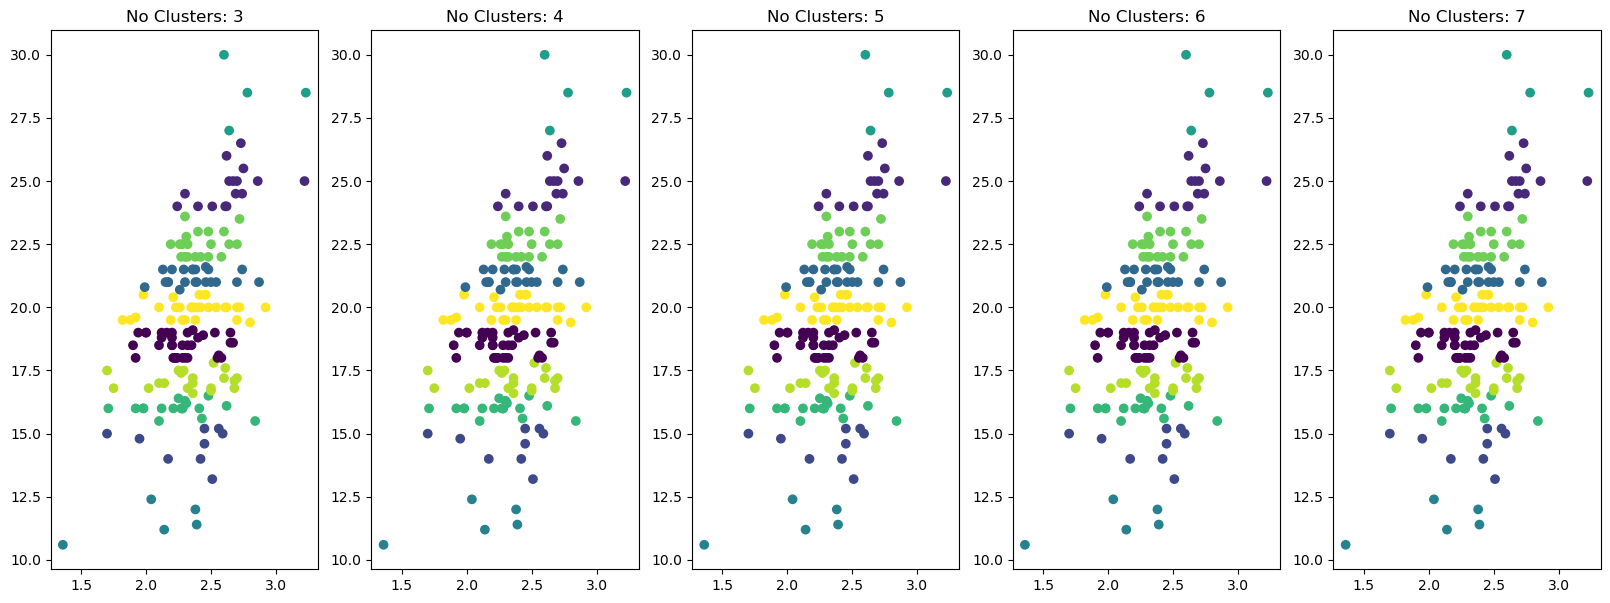

In [18]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,7))

for i,ax in enumerate(fig.axes,start=3): #k=3,4,5,6,7
    ax.scatter(x=df['Ash'],y=df['Ash_Alcanity'],c=df[f'km_{i}'])
    ax.set_title(f'No Clusters: {i}')

In [19]:
#  hierarchical clustering

In [20]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3,km_4,km_5,km_6,km_7
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,6,6,6,6,6
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4,4,4,4,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,0,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,8,8,8,8,8
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,9,9,9,9,9
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,7,7,7,7,7
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,9,9,9,9,9
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,9,9,9,9,9


In [21]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3,km_4,km_5,km_6,km_7
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.166970,0.166970,0.166970,0.166970,0.166970
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.017665,0.017665,0.017665,0.017665,0.017665
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.008480,-0.008480,-0.008480,-0.008480,-0.008480
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.057638,-0.057638,-0.057638,-0.057638,-0.057638
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.035806,0.035806,0.035806,0.035806,0.035806
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.021387,-0.021387,-0.021387,-0.021387,-0.021387
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.046937,-0.046937,-0.046937,-0.046937,-0.046937
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.143583,0.143583,0.143583,0.143583,0.143583
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.102536,-0.102536,-0.102536,-0.102536,-0.102536
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.175155,0.175155,0.175155,0.175155,0.175155


In [22]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2)

In [23]:
pc_arr=pc.fit_transform(df)
pc_arr.shape

(178, 2)

In [24]:
trans_data=pd.DataFrame(pc_arr,columns=["PC1","PC2"])

In [25]:
trans_data

,PC1,PC2
0,318.573406,21.429265
1,303.089463,-5.286472
2,438.014980,-6.181403
3,733.265534,0.057357
4,-11.585950,18.584457
...,...,...
173,-6.939209,-4.831332
174,3.153999,2.174360
175,88.498254,18.487131
176,93.496380,18.382811


In [26]:
trans_data.corr().round(2)

,PC1,PC2
PC1,1.0,0.0
PC2,0.0,1.0


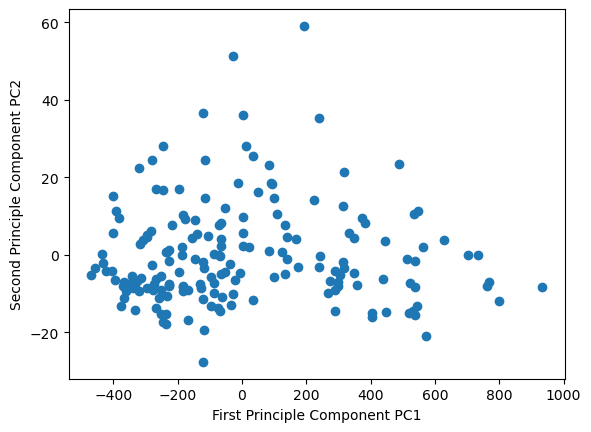

In [27]:
plt.scatter(trans_data["PC1"],trans_data["PC2"])
plt.xlabel("First Principle Component PC1")
plt.ylabel("Second Principle Component PC2")
plt.show()

In [28]:
pc.explained_variance_ratio_*100

array([99.7543742 ,  0.17359518])

In [29]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [30]:
mergings = linkage(df,method="complete")

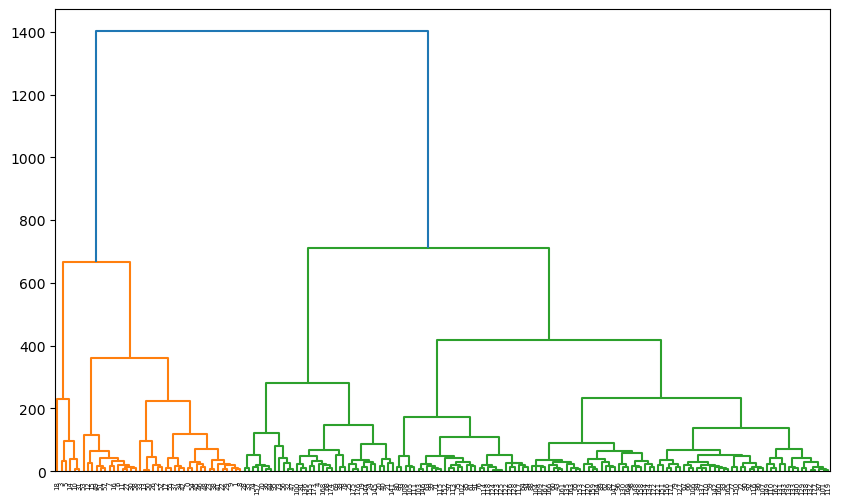

In [31]:
plt.figure(figsize=(10,6))
dendrogram(mergings,labels=df.index)
plt.show()

In [32]:
from scipy.cluster.hierarchy import fcluster

In [33]:
lables=fcluster(mergings,3,criterion="distance")

In [34]:
pd.Series(lables).value_counts()

20     2
30     1
108    1
98     1
86     1
      ..
127    1
88     1
105    1
117    1
174    1
Length: 177, dtype: int64